## Proyecto Zuber

Trabajaremos con una empresa nueva llamada Zuber, la empresa se dedica a viajes compartidos que se está lanzando en Chicago.

Buscaremos patrones con la información que nos hicieron disponible.
Trabajaremos con los datos de los competidores y además analizaremos el impacto del clima en la frecuencia de los viajes.

## Análisis exploratorio de datos 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [47]:
taxi_data = pd.read_csv('../moved_project_sql_result_01.csv')
display(taxi_data.head())
taxi_data.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [48]:
trip_data = pd.read_csv('../moved_project_sql_result_04.csv')
display(trip_data.head())
trip_data.info()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- Data_taxi:    

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

-Trip_data: 

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

-Identificar los 10 principales barrios en términos de finalización del recorrido


In [49]:
finish_by_location = trip_data.groupby('dropoff_location_name')['average_trips'].sum().reset_index()

# Ordenar los barrios por la métrica de finalización en orden descendente
finish_by_location = finish_by_location.sort_values(by='average_trips', ascending=False)

# Seleccionar los 10 principales barrios
top_10_location = finish_by_location.head(10)

print(top_10_location)

   dropoff_location_name  average_trips
50                  Loop   10727.466667
68           River North    9523.666667
78         Streeterville    6664.666667
87             West Loop    5163.666667
63                O'Hare    2546.900000
44             Lake View    2420.966667
35            Grant Park    2068.533333
56         Museum Campus    1510.000000
32            Gold Coast    1364.233333
74    Sheffield & DePaul    1259.766667


- Número de viajes, los 10 barrios principales por número de finalizaciones

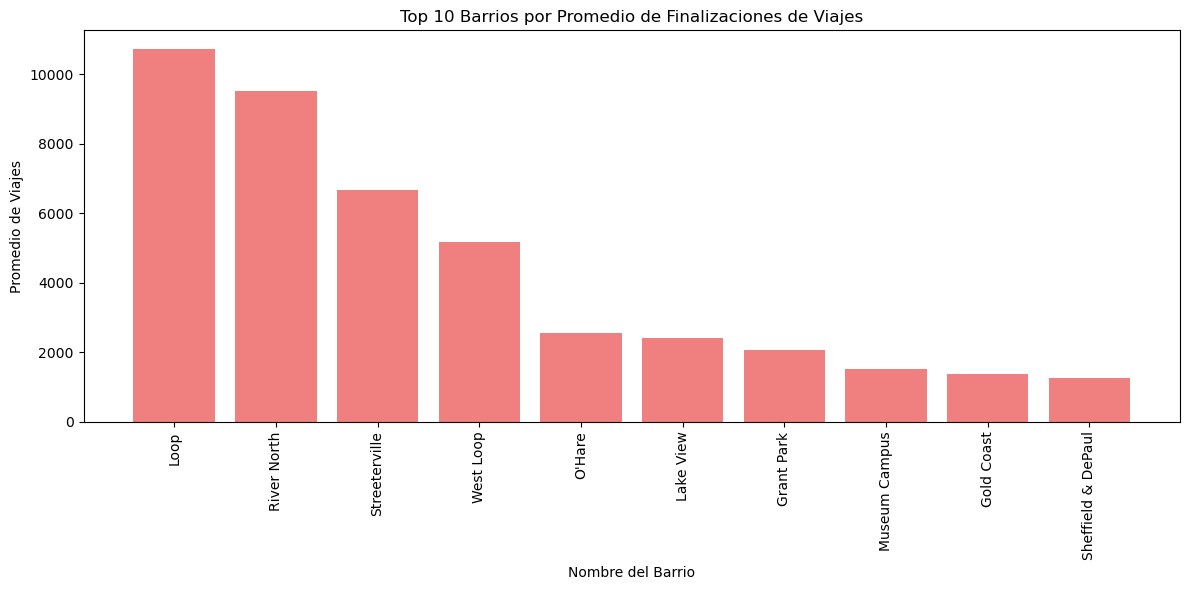

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_location['dropoff_location_name'], top_10_location['average_trips'], color='lightcoral')
plt.xlabel('Nombre del Barrio')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios por Promedio de Finalizaciones de Viajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Podemos observar que el barrio con mayor promedio de viajes es 'Loop' con una cantidad de 10727.466667 recorridos

- Identificar los 10 principales taxis

In [51]:
principal_taxis = taxi_data.groupby('company_name')['trips_amount'].sum().reset_index()

# Ordenar los taxis en orden descendente
principal_taxis = principal_taxis.sort_values(by='trips_amount', ascending=False)

# Seleccionar los 10 principales taxis
top_10_taxi = principal_taxis.head(10)

print(top_10_taxi)

                         company_name  trips_amount
45                          Flash Cab         19558
61          Taxi Affiliation Services         11422
50                   Medallion Leasin         10367
63                         Yellow Cab          9888
60    Taxi Affiliation Service Yellow          9299
36          Chicago Carriage Cab Corp          9181
43                       City Service          8448
59                           Sun Taxi          7701
58          Star North Management LLC          7455
33  Blue Ribbon Taxi Association Inc.          5953


- Empresas de taxis, los 10 principales taxis

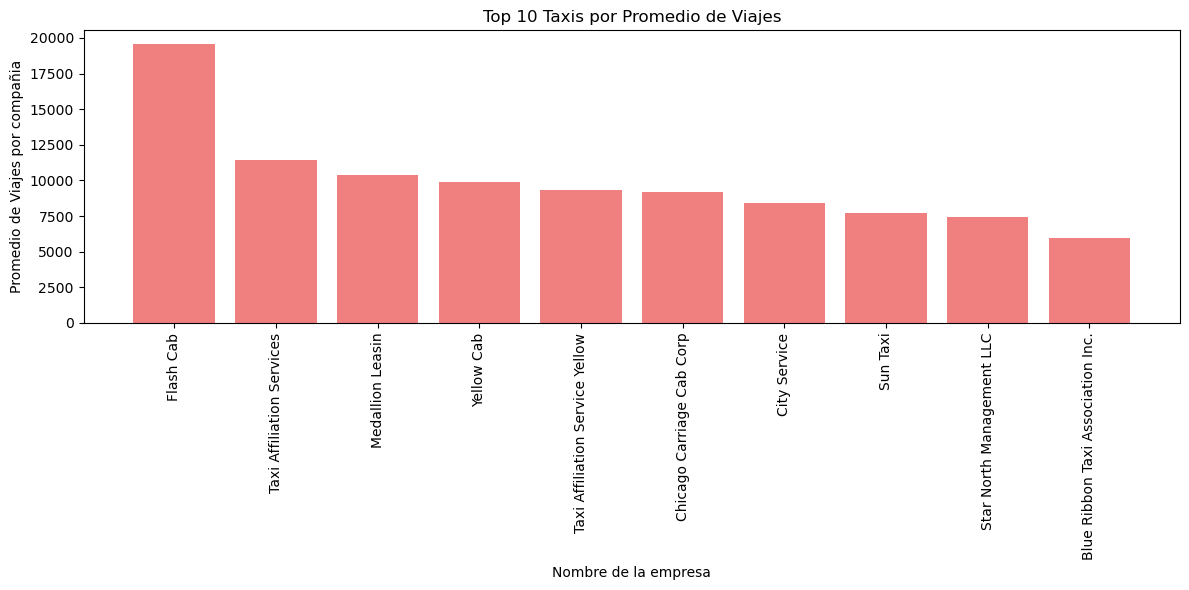

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_taxi['company_name'], top_10_taxi['trips_amount'], color='lightcoral')
plt.xlabel('Nombre de la empresa')
plt.ylabel('Promedio de Viajes por compañia')
plt.title('Top 10 Taxis por Promedio de Viajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Podemos observar con la gráfica que la empresa con mayor promedio de viajes es 'Flash Cab' con una cantidad de 19558 viajes

## Prueba de hipótesis (Python)

In [53]:
travel_data = pd.read_csv('../moved_project_sql_result_07.csv')
display(travel_data.head())
travel_data.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- Travel_data: 

start_ts: fecha y hora de la recogida

weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

duration_seconds: duración del viaje en segundos

# Prueba de Hipótesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [54]:
travel_data['start_ts'] = pd.to_datetime(travel_data['start_ts'], errors='coerce')

# Verificamos si hay valores nulos después de la conversión
print(f"Valores nulos en 'start_ts' después de la conversión: {travel_data['start_ts'].isnull().sum()}")

travel_data['day_of_week'] = travel_data['start_ts'].dt.day_name()
travel_data['is_saturday_rainy'] = (travel_data['day_of_week'] == 'Saturday') & (travel_data['weather_conditions'].str.contains('Rain', case=False, na=False))

# Filtrar los viajes en sábados lluviosos y los viajes en otros días
saturday_rainy_trips = travel_data[travel_data['is_saturday_rainy']]['duration_seconds']
other_trips = travel_data[~travel_data['is_saturday_rainy']]['duration_seconds']

# Estadísticas descriptivas
print("Estadísticas descriptivas de la duración de los viajes en sábados lluviosos:")
print(saturday_rainy_trips.describe())
print("\nEstadísticas descriptivas de la duración de los viajes en otros días:")
print(other_trips.describe())


Valores nulos en 'start_ts' después de la conversión: 0
Estadísticas descriptivas de la duración de los viajes en sábados lluviosos:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: duration_seconds, dtype: float64

Estadísticas descriptivas de la duración de los viajes en otros días:
count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


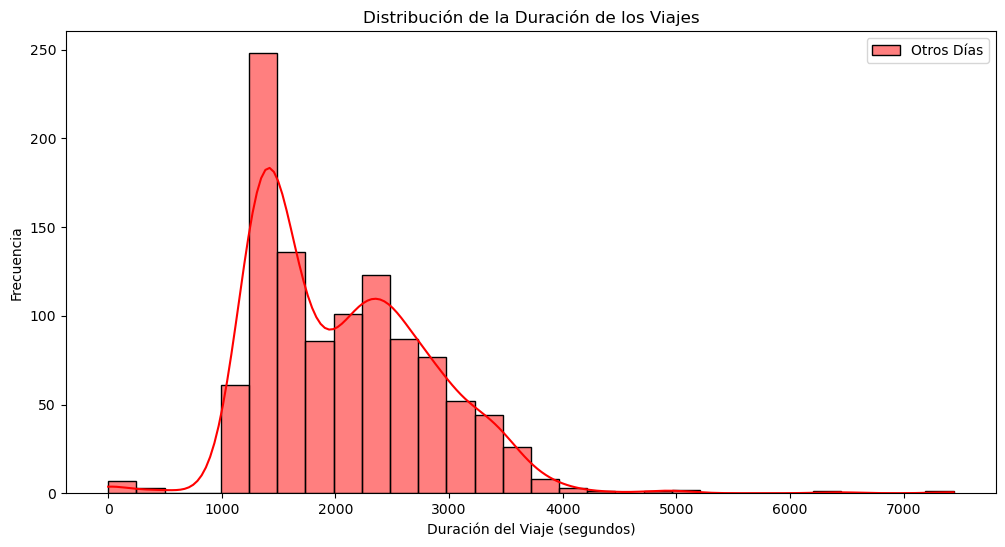

In [55]:
# Visualización de los datos
plt.figure(figsize=(12, 6))
sns.histplot(saturday_rainy_trips, kde=True, color='blue', label='Sábados Lluviosos', bins=30)
sns.histplot(other_trips, kde=True, color='red', label='Otros Días', bins=30)
plt.xlabel('Duración del Viaje (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de los Viajes')
plt.legend()
plt.show()

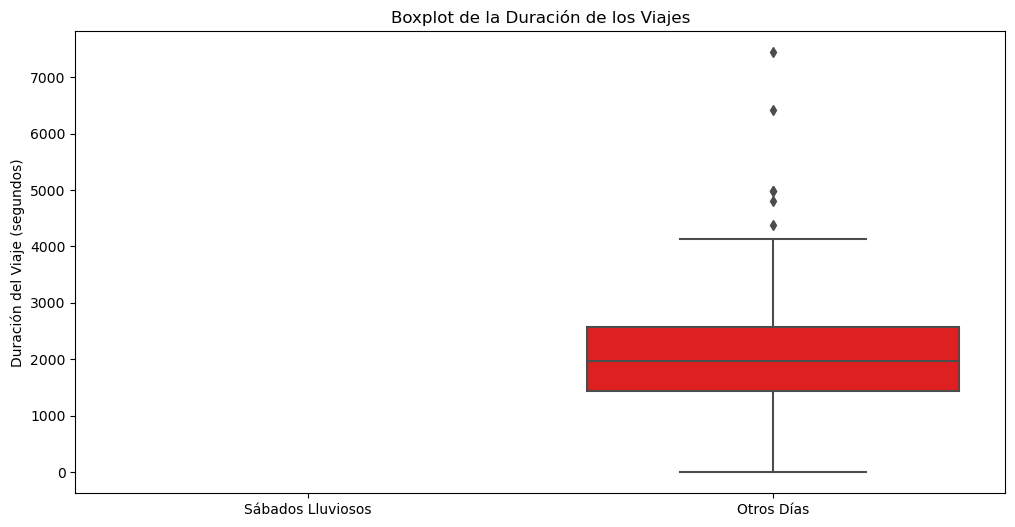

In [56]:
# Boxplot para comparar la duración de los viajes
plt.figure(figsize=(12, 6))
sns.boxplot(data=[saturday_rainy_trips, other_trips], palette=['blue', 'red'])
plt.xticks([0, 1], ['Sábados Lluviosos', 'Otros Días'])
plt.ylabel('Duración del Viaje (segundos)')
plt.title('Boxplot de la Duración de los Viajes')
plt.show()

In [57]:
travel_data['start_ts'] = pd.to_datetime(travel_data['start_ts'])

# Extraer el día de la semana y la información sobre si es un sábado lluvioso

travel_data['day_of_week'] = travel_data['start_ts'].dt.day_name()
travel_data['is_saturday_rainy'] = (travel_data['day_of_week'] == 'Saturday') & (travel_data['weather_conditions'].str.contains('Rain', case=False, na=False))

# Filtrar los viajes en sábados lluviosos y los viajes en otros días
saturday_rainy_trips = travel_data[travel_data['is_saturday_rainy']]['duration_seconds']
other_trips = travel_data[~travel_data['is_saturday_rainy']]['duration_seconds']

mean_saturday_rainy = saturday_rainy_trips.mean()
mean_other_days = other_trips.mean()
std_saturday_rainy = saturday_rainy_trips.std()
std_other_days = other_trips.std()

print(f"Duración promedio de viajes en sábados lluviosos: {mean_saturday_rainy:.2f} segundos")
print(f"Duración promedio de viajes en otros días: {mean_other_days:.2f} segundos")



Duración promedio de viajes en sábados lluviosos: nan segundos
Duración promedio de viajes en otros días: 2071.73 segundos


In [58]:
t_stat, p_value = stats.ttest_ind(saturday_rainy_trips, other_trips, equal_var=False)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en la duración de los viajes en sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración de los viajes cambia en sábados lluviosos.")

Estadístico t: nan
Valor p: nan
No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración de los viajes cambia en sábados lluviosos.


Con el resultado de la prueba T podemos observar que no cambía el promedio de los viajes en sábados lluviosos 

## Conclusiones

En este análisis pudimos obersvar varios datos entre los viajes, las empresas con mayor número de viajes y si las condiciones del clima afectan en los viajes.

Descubrimos que la principal empresa es Flash Cab, pudieramos investigar un poco más afondo qué es lo que ofrece esa empresa a sus clientes o por qué ellos prefieren viajar con esa empresa, ¿acaso son más baratos sus viajes?, ¿es rápido encontrar a un conductor para los vaijes?, etc.
También el barrio con mayor número de viajes fue Loop, esto pudieramos usarlo como ventaja para ofrecer ciertas promociones a los usuarios que tengan más viajes, hacerles un tipo de descuento y así viajen más seguido con nosotros.
El estudio y análisis de los datos nos permiten tomar desiciones enfocadas, analizando y ofreciendo ofertas para que nuestros clientes nos elijan.


